In [1]:
import sys
sys.path.append('../')
from src.OmicsGenerator import OmicsGenerator
from src.visualization import plot_timecourse, plot_pca

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

import numpy as np
np.random.seed(10)

# Initialize generator with intervention

In [2]:
# initialize generator:
gen = OmicsGenerator(
    100,                   # 100 time points
    ['mgx', 'mbx'],        # 2 nodes named 'mgx' and 'mbx'
    [15, 15],              # each node has 15 dimensions
    init_full=True         # set interaction matrices and growth rates randomly
)

# add intervention:
gen.add_intervention(
    'intervention1',       # intervention name
    'mgx',                 # apply to 'mgx' node
    10*np.random.rand(15), # set intervention response vector randomly
    start=50,              # start at t=50
    end=100                # go to end
)

Node 'mgx' initialized
Node 'mbx' initialized
Interaction 'mgx->mgx' added
set m:(mgx)->(mgx):   0:15    0:15
Interaction 'mgx->mbx' added
set m:(mgx)->(mbx):   0:15    15:30
Interaction 'mbx->mgx' added
set m:(mbx)->(mgx):   15:30    0:15
Interaction 'mbx->mbx' added
set m:(mbx)->(mbx):   15:30    15:30
Added growth rates to node mgx
Added growth rates to node mgx
Added growth rates to node mbx
Added growth rates to node mbx
Initialized


# Single timecourse

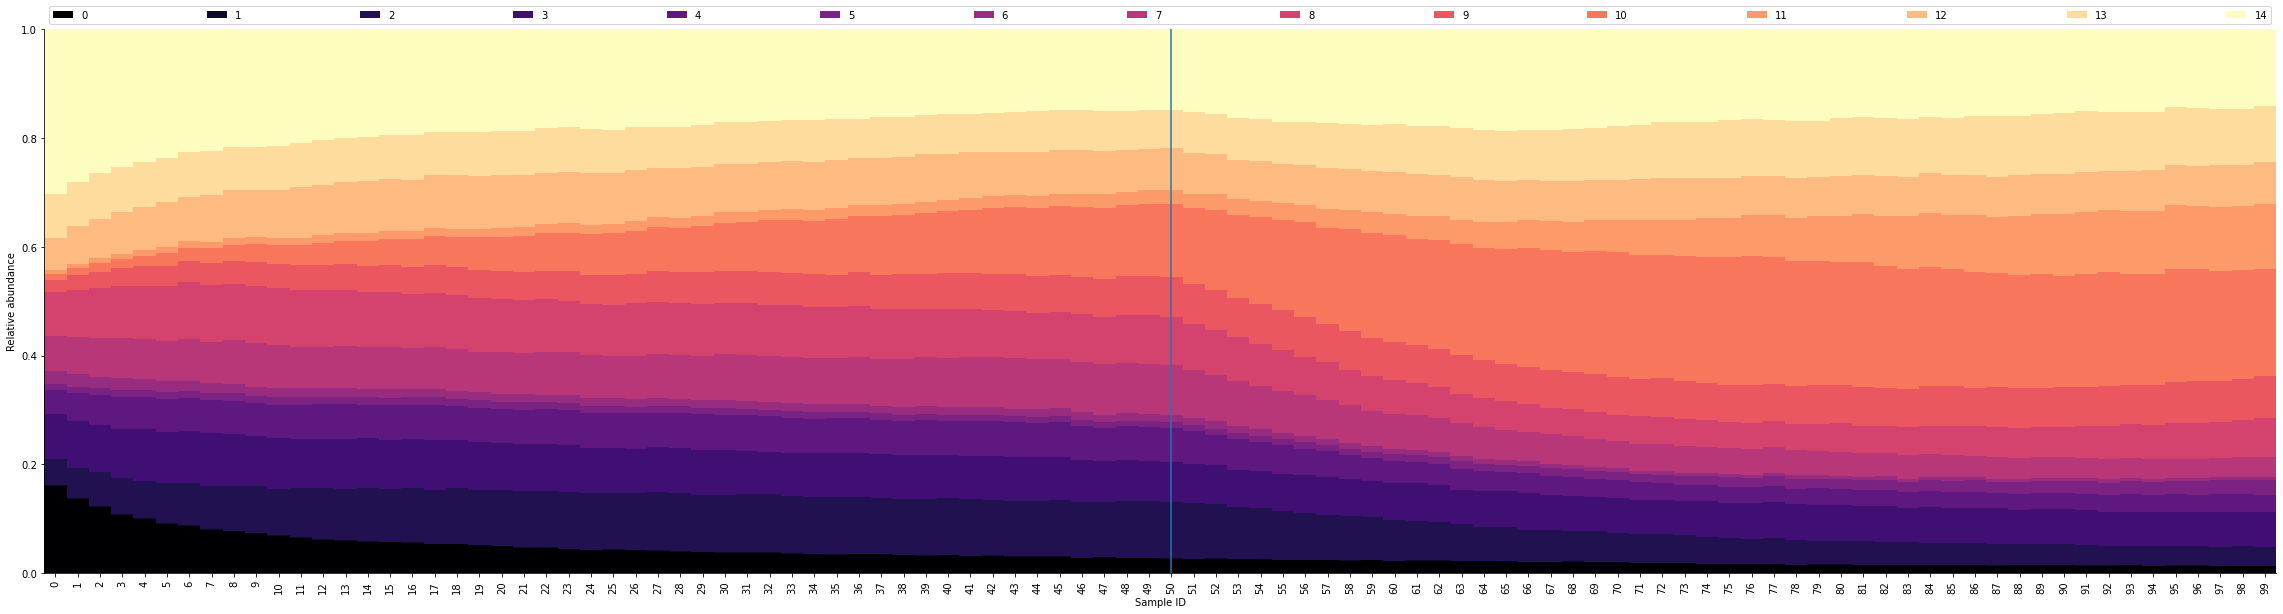

In [3]:
# run generator and plot:
x1, y1, z1 = gen.generate(dt=1e-2)
plot_timecourse(y1['mgx'])
plt.vlines(50, 0, 1)

# Multiple timecourses

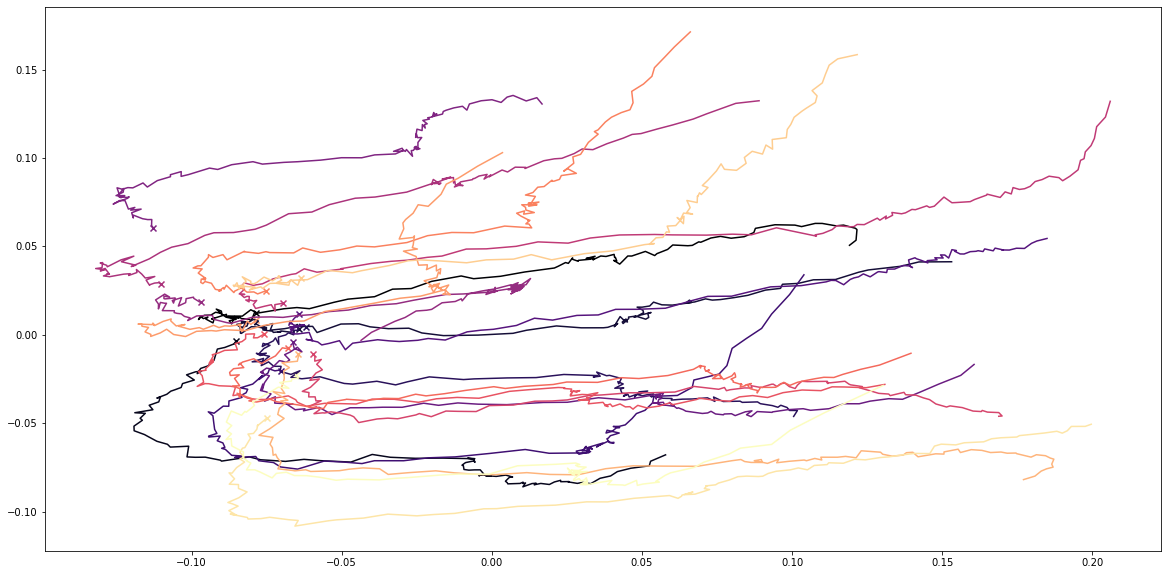

In [4]:
# run multi-generator and plot:
x2, y2, z2 = gen.generate_multiple(20)
plot_pca([y2], 'mgx')

# Case-control

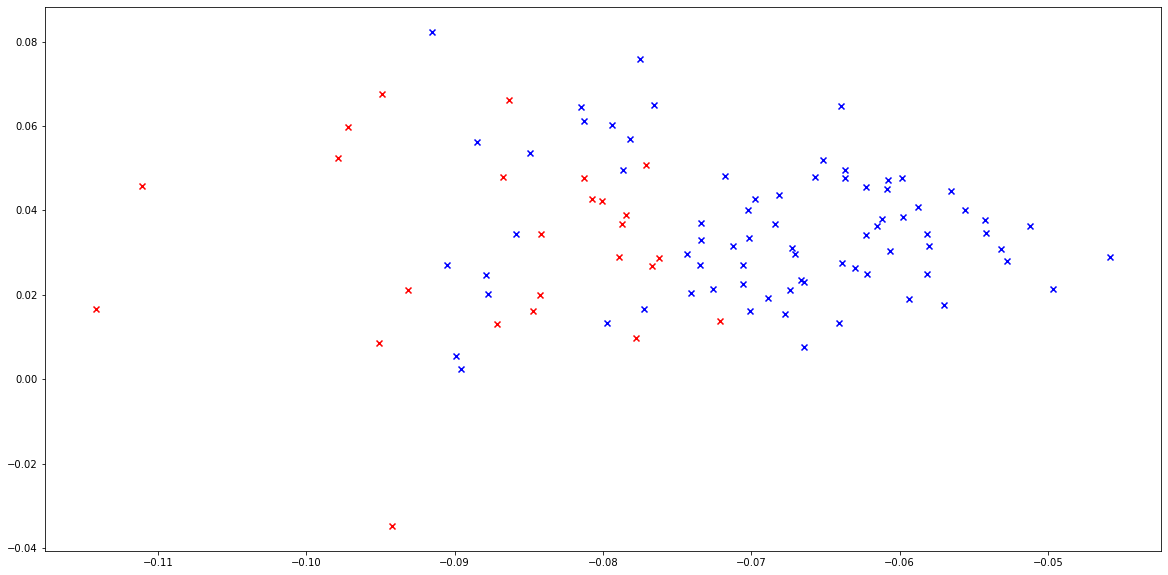

In [5]:
# run case-control and plot:
x3_control, y3_control, z3_control, x3_case, y3_case, z3_case = gen.case_control(100, .75, 'mgx', 1)
plot_pca([y3_control, y3_case], 'mgx', colors=['red', 'blue'], plot_trajectories=False)